In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv(r"C:\Users\Hp\Desktop\housePrice.csv")
df1.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [3]:
df1.shape

(3479, 8)

In [4]:
df1.groupby('Address')['Address'].agg('count')

Address
Abazar         23
Abbasabad       2
Absard          6
Abuzar          3
Afsarieh        6
               ..
Yousef Abad    38
Zafar          10
Zaferanieh     27
Zargandeh       4
Zibadasht       1
Name: Address, Length: 192, dtype: int64

In [5]:
df2 = df1.drop(['Price', 'Elevator'], axis='columns')
df2.head()

,Area,Room,Parking,Warehouse,Address,Price(USD)
0,63,1,True,True,Shahran,61666.67
1,60,1,True,True,Shahran,61666.67
2,79,2,True,True,Pardis,18333.33
3,95,2,True,True,Shahrake Qods,30083.33
4,123,2,True,True,Shahrake Gharb,233333.33


In [6]:
df2.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Address       23
Price(USD)     0
dtype: int64

In [7]:
df3 = df2.dropna()
df3.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Address       0
Price(USD)    0
dtype: int64

In [8]:
df3.shape

(3456, 6)

In [9]:
df4 = df3[~df3['Area'].str.contains(',')]

In [10]:
df4[df4['Area'].str.contains(',')]

,Area,Room,Parking,Warehouse,Address,Price(USD)


In [11]:
df4['Area'].unique()

array(['63', '60', '79', '95', '123', '70', '87', '59', '54', '71', '68',
       '64', '136', '155', '140', '42', '93', '65', '99', '105', '160',
       '77', '110', '100', '90', '49', '96', '67', '62', '55', '129',
       '109', '58', '150', '130', '88', '51', '113', '98', '75', '61',
       '72', '122', '215', '101', '53', '74', '114', '151', '300', '76',
       '148', '40', '128', '94', '97', '137', '85', '78', '48', '82',
       '120', '139', '66', '80', '44', '50', '121', '141', '127', '180',
       '158', '144', '245', '190', '108', '117', '200', '125', '236',
       '220', '86', '84', '106', '320', '154', '210', '124', '83', '270',
       '104', '103', '165', '135', '132', '81', '153', '166', '175',
       '170', '115', '118', '116', '43', '230', '91', '126', '450', '500',
       '145', '112', '192', '164', '265', '92', '143', '350', '335',
       '235', '225', '221', '312', '188', '198', '650', '179', '256',
       '257', '167', '246', '168', '280', '69', '400', '660', '213', '

In [12]:
df4.loc[:, 'Area'] = df4.loc[:, 'Area'].astype(int)

C:\Users\Hp\AppData\Local\Temp\ipykernel_1568\1107170446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[:, 'Area'] = df4.loc[:, 'Area'].astype(int)
C:\Users\Hp\AppData\Local\Temp\ipykernel_1568\1107170446.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df4.loc[:, 'Area'] = df4.loc[:, 'Area'].astype(int)


In [13]:
subset = df4.loc[:, 'Area'].copy()

# Convert the subset from object to integer
subset = subset.astype(int)
df5 = df4.copy()
# Assign the modified subset back to the original DataFrame
df5.loc[:, 'Area'] = subset

In [14]:
df5['price_per_sqm'] = df5['Price(USD)']/df5['Area']

In [15]:
df5

,Area,Room,Parking,Warehouse,Address,Price(USD),price_per_sqm
0,63,1,True,True,Shahran,61666.67,978.836032
1,60,1,True,True,Shahran,61666.67,1027.777833
2,79,2,True,True,Pardis,18333.33,232.067468
3,95,2,True,True,Shahrake Qods,30083.33,316.666632
4,123,2,True,True,Shahrake Gharb,233333.33,1897.018943
...,...,...,...,...,...,...,...
3474,86,2,True,True,Southern Janatabad,116666.67,1356.589186
3475,83,2,True,True,Niavaran,226666.67,2730.923735
3476,75,2,False,False,Parand,12166.67,162.222267
3477,105,2,True,True,Dorous,186666.67,1777.777810


In [16]:
len(df5.Address.unique())

192

In [17]:
df5.Address = df5.Address.apply(lambda x: x.strip())

address_stats = df5.groupby('Address')['Address'].agg('count').sort_values(ascending=False)
address_stats

Address
Punak                     161
Pardis                    146
West Ferdows Boulevard    145
Gheitarieh                140
Shahran                   130
                         ... 
Pakdasht KhatunAbad         1
Firoozkooh Kuhsar           1
Sohanak                     1
Gandhi                      1
Zibadasht                   1
Name: Address, Length: 192, dtype: int64

In [18]:
len(address_stats[address_stats<=2])

69

In [19]:
df5[df5.Area/df5.Room<100]

,Area,Room,Parking,Warehouse,Address,Price(USD),price_per_sqm
0,63,1,True,True,Shahran,61666.67,978.836032
1,60,1,True,True,Shahran,61666.67,1027.777833
2,79,2,True,True,Pardis,18333.33,232.067468
3,95,2,True,True,Shahrake Qods,30083.33,316.666632
4,123,2,True,True,Shahrake Gharb,233333.33,1897.018943
...,...,...,...,...,...,...,...
3474,86,2,True,True,Southern Janatabad,116666.67,1356.589186
3475,83,2,True,True,Niavaran,226666.67,2730.923735
3476,75,2,False,False,Parand,12166.67,162.222267
3477,105,2,True,True,Dorous,186666.67,1777.777810


In [20]:
df5.price_per_sqm.describe()

count     3450.000000
mean      1375.807913
std       1055.277041
min          0.750000
25%        666.666700
50%       1157.651049
75%       1832.410588
max      13888.888889
Name: price_per_sqm, dtype: float64

In [21]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Address'):
        m = np.mean(subdf.price_per_sqm)
        st = np.std(subdf.price_per_sqm)
        reduced_df = subdf[(subdf.price_per_sqm>(m-st)) & (subdf.price_per_sqm<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(2601, 7)

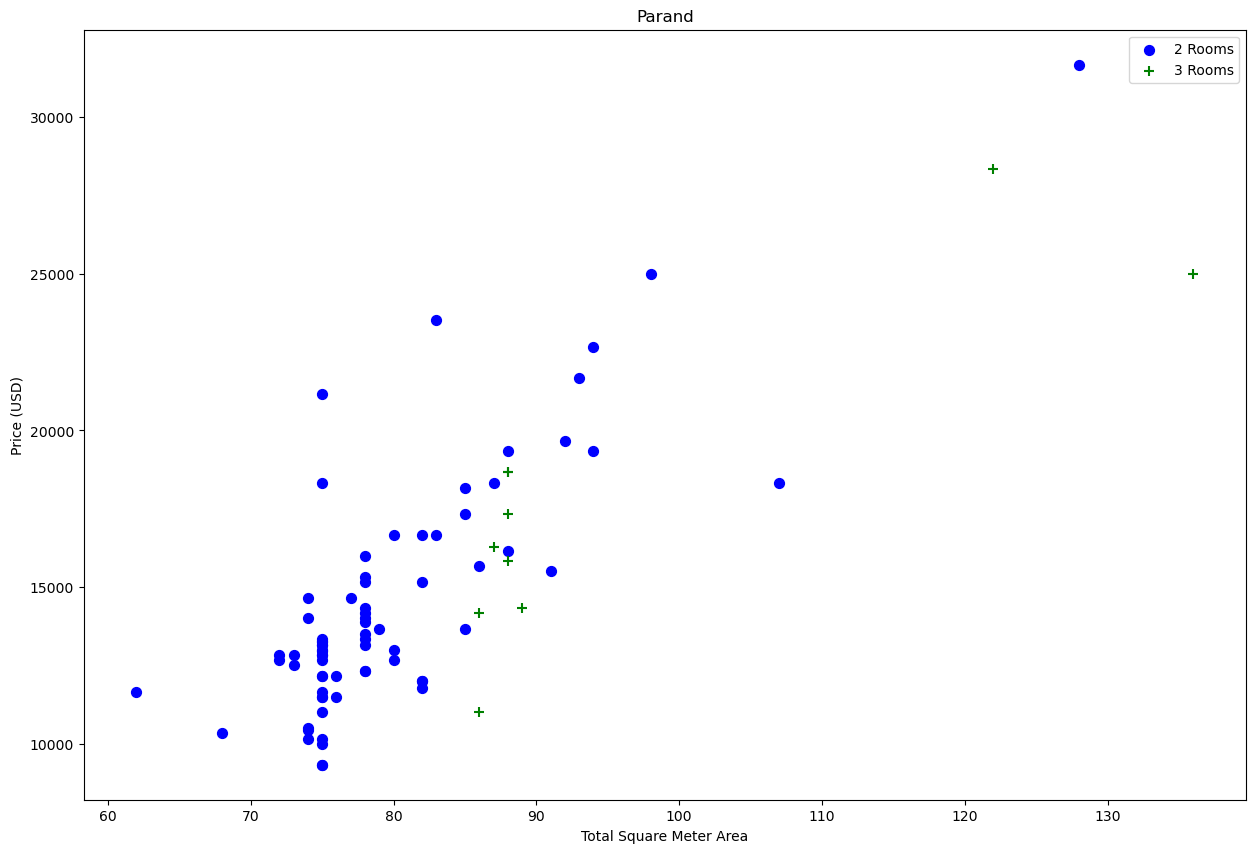

In [22]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.Address==location) & (df.Room==2)]
    bhk3 = df[(df.Address==location) & (df.Room==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.Area,bhk2['Price(USD)'],color='blue',label='2 Rooms', s=50)
    plt.scatter(bhk3.Area,bhk3['Price(USD)'],marker='+', color='green',label='3 Rooms', s=50)
    plt.xlabel("Total Square Meter Area")
    plt.ylabel("Price (USD)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6, "Parand")

In [23]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Address'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('Room'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqm),
                'std': np.std(bhk_df.price_per_sqm),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('Room'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqm<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
df7.shape

(1957, 7)

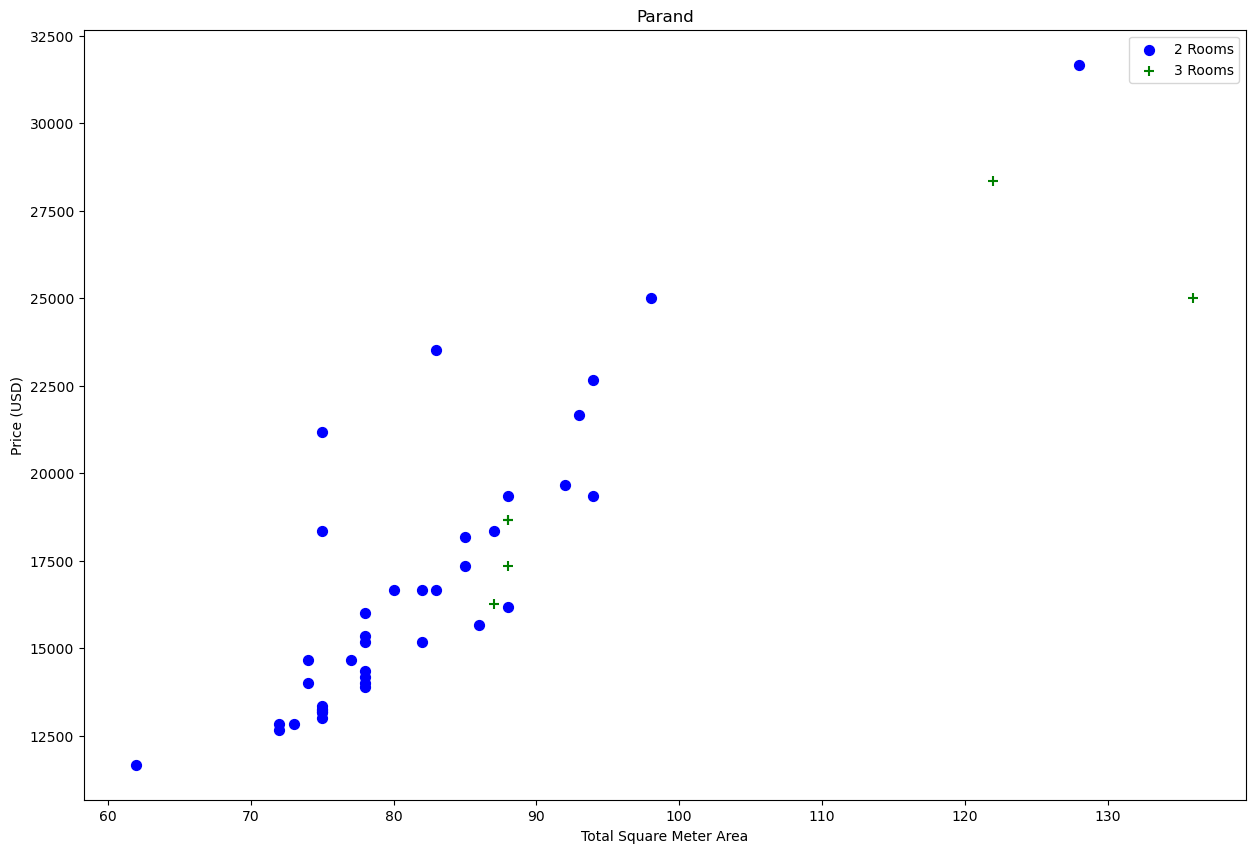

In [24]:
plot_scatter_chart(df7, "Parand")

Text(0, 0.5, 'Count')

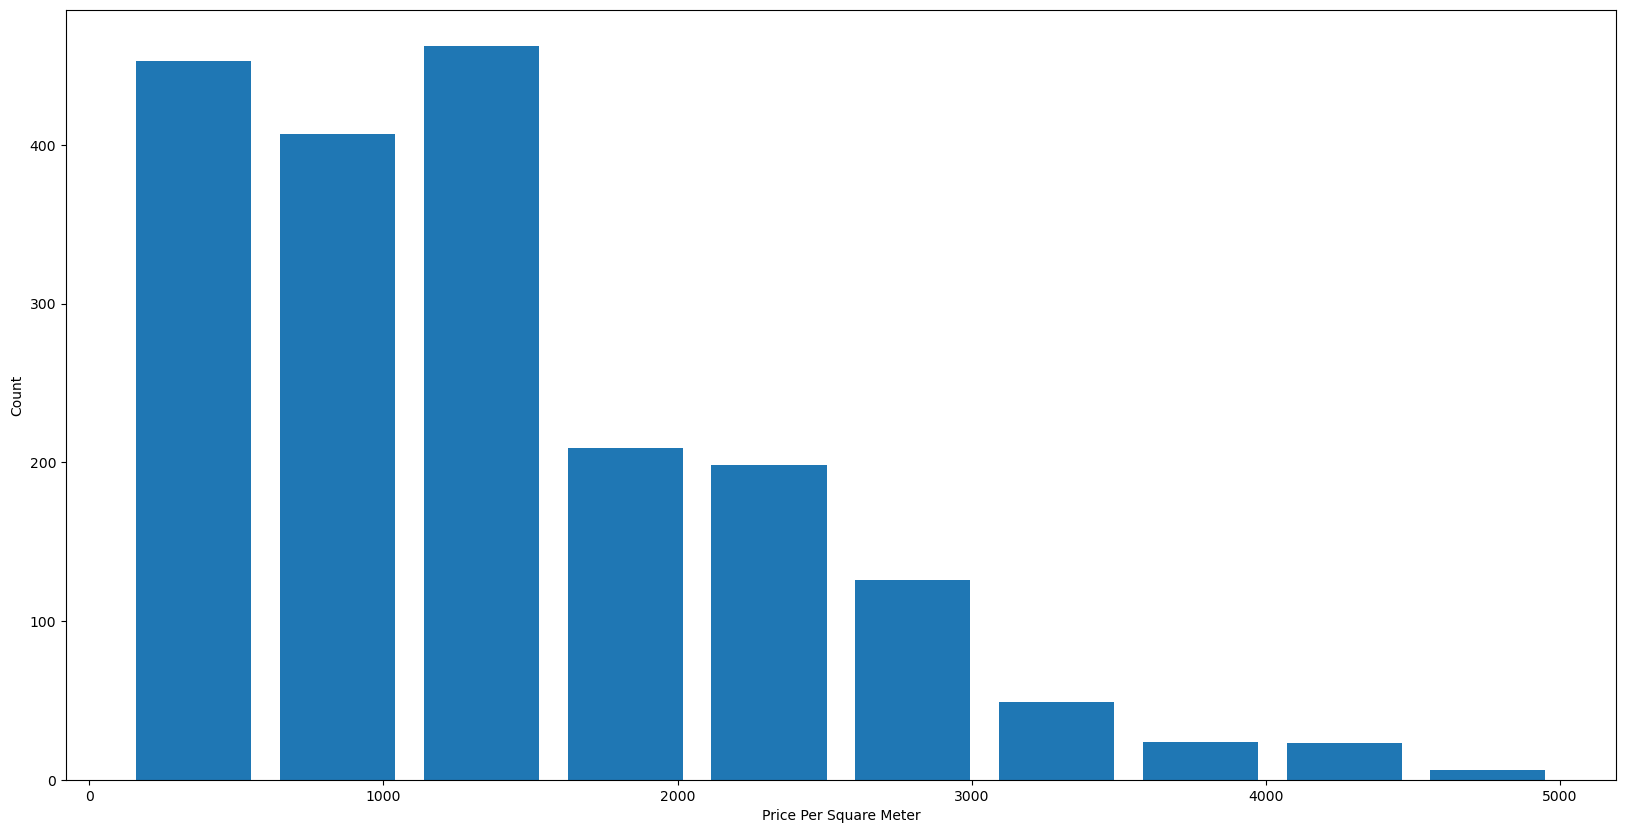

In [25]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqm,rwidth=0.8)
plt.xlabel("Price Per Square Meter")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

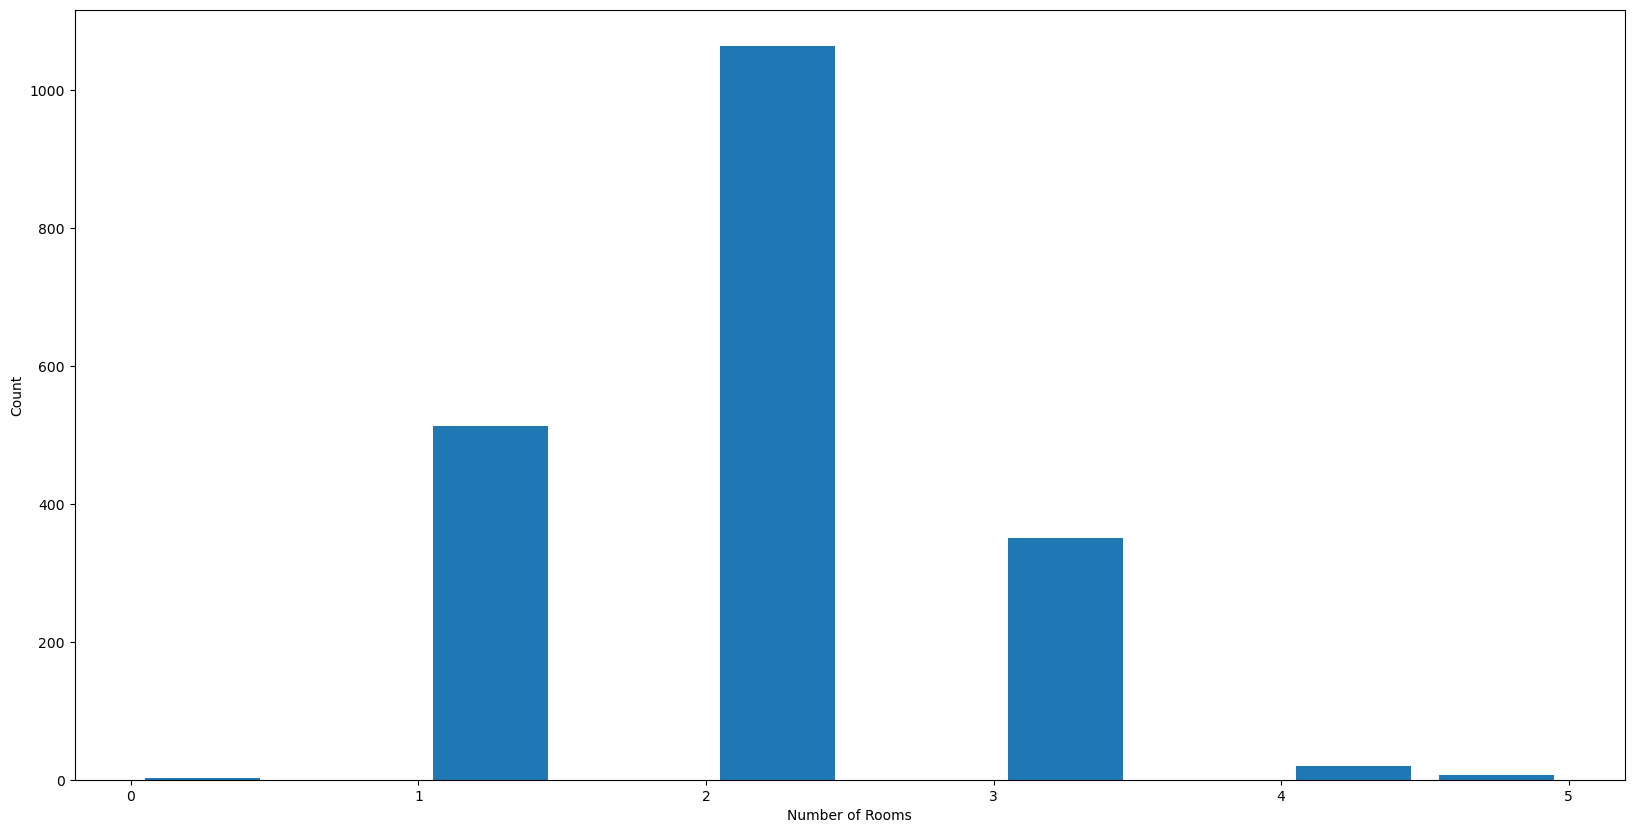

In [26]:
plt.hist(df7.Room,rwidth=0.8)
plt.xlabel("Number of Rooms")
plt.ylabel("Count")

In [27]:
df7 = df7.rename(columns={'Price(USD)': 'Price'})
df7.head()

,Area,Room,Parking,Warehouse,Address,Price,price_per_sqm
0,79,2,True,True,Abazar,100000.00,1265.822785
2,95,2,True,True,Abazar,186666.67,1964.912316
3,95,2,True,True,Abazar,150000.00,1578.947368
4,102,2,True,True,Abazar,173333.33,1699.346373
5,120,2,True,True,Abazar,208333.33,1736.111083


In [28]:
df8 = df7[df7.Room!=0]
df8.shape
df8.reset_index(drop=True, inplace=True)
df8.head()

,Area,Room,Parking,Warehouse,Address,Price,price_per_sqm
0,79,2,True,True,Abazar,100000.00,1265.822785
1,95,2,True,True,Abazar,186666.67,1964.912316
2,95,2,True,True,Abazar,150000.00,1578.947368
3,102,2,True,True,Abazar,173333.33,1699.346373
4,120,2,True,True,Abazar,208333.33,1736.111083


In [29]:
df9 = df8.drop(['price_per_sqm', 'Parking', 'Warehouse'], axis='columns')
df9.head(3)

,Area,Room,Address,Price
0,79,2,Abazar,100000.00
1,95,2,Abazar,186666.67
2,95,2,Abazar,150000.00


In [30]:
dummies = pd.get_dummies(df9.Address)
dummies.head(3)

,Abazar,Abbasabad,Absard,Abuzar,Afsarieh,Ahang,Air force,Ajudaniye,Amir Bahador,Amirabad,...,Valiasr,Velenjak,Water Organization,Waterfall,West Ferdows Boulevard,West Pars,Yousef Abad,Zafar,Zaferanieh,Zargandeh
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df10 = pd.concat([df9, dummies], axis='columns')
df10.head()

,Area,Room,Address,Price,Abazar,Abbasabad,Absard,Abuzar,Afsarieh,Ahang,...,Valiasr,Velenjak,Water Organization,Waterfall,West Ferdows Boulevard,West Pars,Yousef Abad,Zafar,Zaferanieh,Zargandeh
0,79,2,Abazar,100000.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,95,2,Abazar,186666.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,95,2,Abazar,150000.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,102,2,Abazar,173333.33,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2,Abazar,208333.33,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df11 = df10.drop('Address',axis='columns')
df11.head(2)

,Area,Room,Price,Abazar,Abbasabad,Absard,Abuzar,Afsarieh,Ahang,Air force,...,Valiasr,Velenjak,Water Organization,Waterfall,West Ferdows Boulevard,West Pars,Yousef Abad,Zafar,Zaferanieh,Zargandeh
0,79,2,100000.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,95,2,186666.67,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X = df11.drop('Price', axis='columns')
X.head()

,Area,Room,Abazar,Abbasabad,Absard,Abuzar,Afsarieh,Ahang,Air force,Ajudaniye,...,Valiasr,Velenjak,Water Organization,Waterfall,West Ferdows Boulevard,West Pars,Yousef Abad,Zafar,Zaferanieh,Zargandeh
0,79,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,95,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,95,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,102,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
y = df11.Price
y.head()

0    100000.00
1    186666.67
2    150000.00
3    173333.33
4    208333.33
Name: Price, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [36]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8510674400525577

In [37]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y,  cv=cv)

array([-8.90294540e+17, -1.43340826e+15,  9.25018087e-01, -2.30911566e+18,
        8.84490517e-01])

In [38]:
X.columns

Index(['Area', 'Room', 'Abazar', 'Abbasabad', 'Absard', 'Abuzar', 'Afsarieh',
       'Ahang', 'Air force', 'Ajudaniye',
       ...
       'Valiasr', 'Velenjak', 'Water Organization', 'Waterfall',
       'West Ferdows Boulevard', 'West Pars', 'Yousef Abad', 'Zafar',
       'Zaferanieh', 'Zargandeh'],
      dtype='object', length=150)

In [40]:
np.where(X.columns=='Abazar')[0][0]

2

In [43]:
def predict_price(address,area,room):    
    loc_index = np.where(X.columns==address)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = room
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [44]:
predict_price('Abazar',102,3)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


175710.06606574036

In [51]:
import pickle
with open(r"C:\Users\Hp\Desktop\housePrice_model.pickle",'wb') as f:
    pickle.dump(lr_clf,f)

In [50]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))